# Description
This file contains a 15 month model of the financial situation of the CrowdLoan company. The model is based on the company's income, expenses, credits and loans. The model is used to calculate the company's financial situation in the future and to make decisions based on that information.

In [18]:
# Author: Santiago Morales
# Last Modified: 12/10/2020
from model import *
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We set the initial values:

In [19]:
# Three initial loans of COP 30e9, the first due in one month, the second due in two months and the third due in three months. All have 25% annual interest.
time = 0
amount = 30e9
interest = 0.25
initial_loans = []
for i in range(3):
    initial_loans.append(Loan(time, i + 1, interest, amount, "COP"))
    
# New credits: for each one of the following 12 months, CrowdLoan will give a credit of COP 30e9 with 25% annual interest and a duration of 3 months.
duration = 3
amount = 30e9
interest = 0.25
initial_credits = []
for i in range(12):
    initial_credits.append(Credit(i + 1, duration, interest, amount))  

# Inital Fixed Expenses: COP 400e6 per month, USD 70e3 per month and EUR 30e3 per month
initial_fixed_expenses = [(400e6, "COP"), (70e3, "USD"), (30e3, "EUR")]

# Initial debts: CrowdLoan has a debt of USD 3e6 and EUR 2e6. The debt must be paid uniformly over 12 months. The annual interest is 10%.
USD_amount = 3e6
EUR_amount = 2e6
interest = 0.1
USD_individual_debt = USD_amount / 12
EUR_individual_debt = EUR_amount / 12
for i in range(12):
    initial_loans.append(Loan(time, i + 1, interest, USD_individual_debt, "USD"))
    initial_loans.append(Loan(time, i + 1, interest, EUR_individual_debt, "EUR"))


# Initial loans: Crowdloan will take a loan every month for the next three months. The loans will be of USD 200e3 and EUR 250e3. The annual interest is 10% and the duration is one year.
USD_amount = 200e3
EUR_amount = 250e3
interest = 0.1
duration = 12
for i in range(3):
    initial_loans.append(Loan(i + 1, duration, interest, USD_amount, "USD"))
    initial_loans.append(Loan(i + 1, duration, interest, EUR_amount, "EUR"))

# Exchange rates: COP 4600 per USD and COP 4500 per EUR
USD_exchange_rate = 4600
EUR_exchange_rate = 4500

# Initial balance: COP 90e9 + USD 3e6 + EUR 2e6
initial_balance = 90e9 + 3e6 * USD_exchange_rate + 2e6 * EUR_exchange_rate

In [20]:
# Flow
CrowdLoan = Model(initial_fixed_expenses, initial_credits, initial_loans, initial_balance)

# Simulate 15 months of the model, and save the results in a dataframe at each time step.
# The dataframe will have the following columns: COP flow, USD flow, EUR flow, total flow

# Create the dataframe
df = pd.DataFrame(columns=["COP flow", "USD flow", "EUR flow", "Total flow"])

# Simulate 15 months
for i in range(15):
    CrowdLoan.simulate_month(USD_exchange_rate, EUR_exchange_rate)
    # Add results to the dataframe columns
    df.loc[i] = [CrowdLoan.get_COP_flow(), CrowdLoan.get_USD_flow(), CrowdLoan.get_EUR_flow(), CrowdLoan.get_total_flow()]
df.index += 1

pd.options.display.float_format = '${:,.2f}'.format
df

,COP flow,USD flow,EUR flow,Total flow
1,"$-61,025,000,000.00","$-122,083.33","$51,944.44","$-61,347,833,333.33"
2,"$-61,650,000,000.00","$-124,166.67","$50,555.56","$-61,988,666,666.67"
3,"$-62,275,000,000.00","$-126,250.00","$49,166.67","$-62,629,500,000.00"
4,"$1,475,000,000.00","$-328,333.33","$-202,222.22","$-945,333,333.33"
5,"$1,475,000,000.00","$-330,416.67","$-203,611.11","$-961,166,666.67"
6,"$1,475,000,000.00","$-332,500.00","$-205,000.00","$-977,000,000.00"
7,"$1,475,000,000.00","$-334,583.33","$-206,388.89","$-992,833,333.33"
8,"$1,475,000,000.00","$-336,666.67","$-207,777.78","$-1,008,666,666.67"
9,"$1,475,000,000.00","$-338,750.00","$-209,166.67","$-1,024,500,000.00"
10,"$1,475,000,000.00","$-340,833.33","$-210,555.56","$-1,040,333,333.33"


In [21]:


CrowdLoan = Model(initial_fixed_expenses, initial_credits, initial_loans, initial_balance, bank_account_duration=1)
# Simulate 15 months of the model, and save the results in a dataframe at each time step.
# The dataframe will have the following columns: time, COP income, USD income, EUR income, total income, COP expenses, USD expenses, EUR expenses, total expenses, COP flow, USD flow, EUR flow, total flow,, Bank balance

# Create the dataframe
df = pd.DataFrame(columns=["Time", "COP income", "USD income", "EUR income", "Total income", "COP expenses", "USD expenses", "EUR expenses", "Total expenses", "COP flow", "USD flow", "EUR flow", "Total flow", "Bank balance"])

print('Initial bank account balance: ${:,.2f}'.format(CrowdLoan.bank_account.balance))
# Simulate 15 months
for i in range(15):
    CrowdLoan.simulate_month(USD_exchange_rate, EUR_exchange_rate)
    # Add results to the dataframe columns
    df.loc[i] = [i + 1, CrowdLoan.COP_income, CrowdLoan.USD_income, CrowdLoan.EUR_income, CrowdLoan.income, CrowdLoan.COP_expenses, CrowdLoan.USD_expenses, CrowdLoan.EUR_expenses, CrowdLoan.expenses, CrowdLoan.get_COP_flow(), CrowdLoan.get_USD_flow(), CrowdLoan.get_EUR_flow(), CrowdLoan.get_total_flow(), CrowdLoan.bank_account.balance]
df.index += 1
    

pd.options.display.float_format = '${:,.2f}'.format
print('Final bank account balance: ${:,.2f}'.format(CrowdLoan.bank_account.balance))
df

Initial bank account balance: $112,800,000,000.00
Final bank account balance: $-5,968,917,671.16


,Time,COP income,USD income,EUR income,Total income,COP expenses,USD expenses,EUR expenses,Total expenses,COP flow,USD flow,EUR flow,Total flow,Bank balance
1,$1.00,"$940,000,000.00","$200,000.00","$250,000.00","$2,990,000,000.00","$61,025,000,000.00","$322,083.33","$198,055.56","$63,397,833,333.33","$-60,085,000,000.00","$-122,083.33","$51,944.44","$-60,407,833,333.33","$52,392,166,666.67"
2,$2.00,"$436,601,388.89","$200,000.00","$250,000.00","$2,486,601,388.89","$61,650,000,000.00","$324,166.67","$199,444.44","$64,038,666,666.67","$-61,213,398,611.11","$-124,166.67","$50,555.56","$-61,552,065,277.78","$-9,159,898,611.11"
3,$3.00,$0.00,"$200,000.00","$250,000.00","$2,050,000,000.00","$62,389,498,732.64","$326,250.00","$200,833.33","$64,793,998,732.64","$-62,389,498,732.64","$-126,250.00","$49,166.67","$-62,743,998,732.64","$-71,903,897,343.75"
4,$4.00,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,298,798,716.80","$328,333.33","$202,222.22","$33,719,132,050.13","$576,201,283.20","$-328,333.33","$-202,222.22","$-1,844,132,050.13","$-73,748,029,393.88"
5,$5.00,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,321,850,367.42","$330,416.67","$203,611.11","$33,758,017,034.09","$553,149,632.58","$-330,416.67","$-203,611.11","$-1,883,017,034.09","$-75,631,046,427.97"
6,$6.00,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,345,388,080.35","$332,500.00","$205,000.00","$33,797,388,080.35","$529,611,919.65","$-332,500.00","$-205,000.00","$-1,922,388,080.35","$-77,553,434,508.32"
7,$7.00,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,369,417,931.35","$334,583.33","$206,388.89","$33,837,251,264.69","$505,582,068.65","$-334,583.33","$-206,388.89","$-1,962,251,264.69","$-79,515,685,773.01"
8,$8.00,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,393,946,072.16","$336,666.67","$207,777.78","$33,877,612,738.83","$481,053,927.84","$-336,666.67","$-207,777.78","$-2,002,612,738.83","$-81,518,298,511.84"
9,$9.00,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,418,978,731.40","$338,750.00","$209,166.67","$33,918,478,731.40","$456,021,268.60","$-338,750.00","$-209,166.67","$-2,043,478,731.40","$-83,561,777,243.23"
10,$10.00,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,444,522,215.54","$340,833.33","$210,555.56","$33,959,855,548.87","$430,477,784.46","$-340,833.33","$-210,555.56","$-2,084,855,548.87","$-85,646,632,792.11"


In [22]:
print("${:,.2f}".format(df["Total flow"].sum()+ initial_balance))

$-5,968,917,671.16


In [23]:
# Simulate USD_exchange_rate and EUR_exchange_rate for 15 months
# Create the dataframe
exchange_rate_df = pd.DataFrame(columns=["Time", "USD exchange rate", "EUR exchange rate"])

# Simulate 15 months with random fluctuations of COP 500 
for i in range(15):
    USD_exchange_rate = 4600
    EUR_exchange_rate = 4500
    USD_exchange_rate += random.randint(-500, 500)
    EUR_exchange_rate += random.randint(-500, 500)
    exchange_rate_df.loc[i] = [i + 1, USD_exchange_rate, EUR_exchange_rate]
exchange_rate_df.index += 1

CrowdLoan = Model(initial_fixed_expenses, initial_credits, initial_loans, initial_balance, bank_account_duration=1)
# Create the dataframe
df = pd.DataFrame(columns=["Time", "COP income", "USD income", "EUR income", "Total income", "COP expenses", "USD expenses", "EUR expenses", "Total expenses", "COP flow", "USD flow", "EUR flow", "Total flow", "Bank balance"])

# Simulate 15 months using the exchange rates from the exchange rate dataframe
for i in range(15):
    CrowdLoan.simulate_month(exchange_rate_df["USD exchange rate"][i + 1], exchange_rate_df["EUR exchange rate"][i + 1])
    # Add results to the dataframe columns
    df.loc[i] = [i + 1, CrowdLoan.COP_income, CrowdLoan.USD_income, CrowdLoan.EUR_income, CrowdLoan.income, CrowdLoan.COP_expenses, CrowdLoan.USD_expenses, CrowdLoan.EUR_expenses, CrowdLoan.expenses, CrowdLoan.get_COP_flow(), CrowdLoan.get_USD_flow(), CrowdLoan.get_EUR_flow(), CrowdLoan.get_total_flow(), CrowdLoan.bank_account.balance]
df.index += 1

pd.options.display.float_format = '${:,.2f}'.format
df  

,Time,COP income,USD income,EUR income,Total income,COP expenses,USD expenses,EUR expenses,Total expenses,COP flow,USD flow,EUR flow,Total flow,Bank balance
1,$1.00,"$940,000,000.00","$200,000.00","$250,000.00","$3,008,350,000.00","$61,025,000,000.00","$322,083.33","$198,055.56","$63,444,543,750.00","$-60,085,000,000.00","$-122,083.33","$51,944.44","$-60,436,193,750.00","$52,363,806,250.00"
2,$2.00,"$436,365,052.08","$200,000.00","$250,000.00","$2,534,865,052.08","$61,650,000,000.00","$324,166.67","$199,444.44","$64,075,802,777.78","$-61,213,634,947.92","$-124,166.67","$50,555.56","$-61,540,937,725.69","$-9,177,131,475.69"
3,$3.00,$0.00,"$200,000.00","$250,000.00","$1,989,850,000.00","$62,389,714,143.45","$326,250.00","$200,833.33","$64,698,089,560.11","$-62,389,714,143.45","$-126,250.00","$49,166.67","$-62,708,239,560.11","$-71,885,371,035.81"
4,$4.00,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,298,567,137.95","$328,333.33","$202,222.22","$33,672,608,804.61","$576,432,862.05","$-328,333.33","$-202,222.22","$-1,797,608,804.61","$-73,682,979,840.42"
5,$5.00,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,321,037,248.01","$330,416.67","$203,611.11","$33,599,124,470.23","$553,962,751.99","$-330,416.67","$-203,611.11","$-1,724,124,470.23","$-75,407,104,310.65"
6,$6.00,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,342,588,803.88","$332,500.00","$205,000.00","$33,685,081,303.88","$532,411,196.12","$-332,500.00","$-205,000.00","$-1,810,081,303.88","$-77,217,185,614.53"
7,$7.00,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,365,214,820.18","$334,583.33","$206,388.89","$33,729,242,042.40","$509,785,179.82","$-334,583.33","$-206,388.89","$-1,854,242,042.40","$-79,071,427,656.94"
8,$8.00,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,388,392,845.71","$336,666.67","$207,777.78","$33,932,401,734.60","$486,607,154.29","$-336,666.67","$-207,777.78","$-2,057,401,734.60","$-81,128,829,391.54"
9,$9.00,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,414,110,367.39","$338,750.00","$209,166.67","$33,951,799,950.73","$460,889,632.61","$-338,750.00","$-209,166.67","$-2,076,799,950.73","$-83,205,629,342.26"
10,$10.00,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,440,070,366.78","$340,833.33","$210,555.56","$33,872,476,477.89","$434,929,633.22","$-340,833.33","$-210,555.56","$-1,997,476,477.89","$-85,203,105,820.15"


In [24]:
print("${:,.2f}".format(df["Total flow"].sum() + initial_balance))

$-5,264,189,567.28


In [25]:
exchange_rate_df

,Time,USD exchange rate,EUR exchange rate
1,1,4983,4113
2,2,4450,4930
3,3,4125,4793
4,4,4265,4815
5,5,4320,4178
6,6,4291,4467
7,7,4526,4117
8,8,4965,4199
9,9,5019,4004
10,10,4576,4145


In [26]:
# Function which given initital fixed expenses, initial credits, initial loans and exchange rate dataframe, returns the sum of the net flow of evey month of the model
def get_total_flow(initial_fixed_expenses, initial_credits, initial_loans, exchange_rate_df):
    CrowdLoan = Model(initial_fixed_expenses, initial_credits, initial_loans, initial_balance, bank_account_duration=1)
    total_flow = 0
    for i in range(15):
        CrowdLoan.simulate_month(exchange_rate_df["USD exchange rate"][i + 1], exchange_rate_df["EUR exchange rate"][i + 1])
        total_flow += CrowdLoan.get_total_flow()
    return total_flow

total_flow = get_total_flow(initial_fixed_expenses, initial_credits, initial_loans, exchange_rate_df)
# Format total_flow to two decimal places
print("${:,.2f}".format(total_flow))

$-118,064,189,567.28


In [27]:
print("${:,.2f}".format(initial_balance + total_flow))

$-5,264,189,567.28


# Risk Factors

Retrieve the data from the Alpha Vantage API and save it in a csv

In [28]:
# # UserLook for 5 years of en-of-month exchange rates of USD and EUR from october 2017 to october 2022 from Alpha Vantage API
# import pandas as pd
# from alpha_vantage.foreignexchange import ForeignExchange
# import matplotlib.pyplot as plt

# api_key = 'L10ZYH1U3ZK86C0C'
# fx = ForeignExchange(key=api_key, output_format='pandas')

# # Get the data, and save it in a dataframe
# data, meta_data = fx.get_currency_exchange_monthly(from_symbol='USD', to_symbol='COP')
# data = data.rename(columns={"4. close": "USD_exchange_rate"})
# data["EUR_exchange_rate"] = fx.get_currency_exchange_monthly(from_symbol='EUR', to_symbol='COP')[0]["4. close"]
# data = data.rename(columns={"4.close": "EUR_exchange_rate"})
# data = data[["USD_exchange_rate", "EUR_exchange_rate"]]
# data = data.sort_index().loc["2017-10-01":"2022-10-31"]

# # Plot the data
# data.plot()
# data.to_csv("exchange_rates.csv")


Read the data

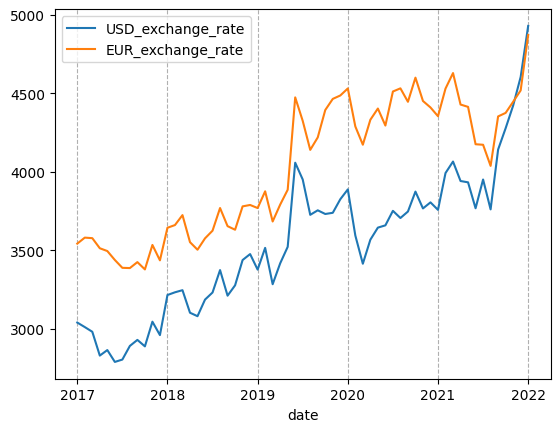

In [29]:
# Read the data from the csv file
data = pd.read_csv("exchange_rates.csv", index_col=0)
data.plot()
# Change x ticks to show only the year
plt.xticks(np.arange(0, len(data), 12), np.arange(2017, 2023))
plt.grid(axis='x', which='major', linestyle='--')
plt.show()

In [30]:
data

,USD_exchange_rate,EUR_exchange_rate
date,,
2017-10-31,"$3,039.80","$3,542.50"
2017-11-30,"$3,011.00","$3,580.75"
2017-12-29,"$2,981.00","$3,577.38"
2018-01-31,"$2,829.40","$3,513.04"
2018-02-28,"$2,864.50","$3,495.27"
...,...,...
2022-06-30,"$4,141.97","$4,352.81"
2022-07-29,"$4,277.60","$4,375.28"
2022-08-31,"$4,421.95","$4,446.05"


In [31]:
# Calculate the percentual volatility (annualized) of each exchange rate
# Calculate the standard deviation of the log of the exchange ratesç
log_data = np.log(data)
log_data["USD_log_return"] = log_data["USD_exchange_rate"].diff()
log_data["EUR_log_return"] = log_data["EUR_exchange_rate"].diff()
log_data = log_data[["USD_log_return", "EUR_log_return"]]
log_data = log_data.dropna()
log_data

,USD_log_return,EUR_log_return
date,,
2017-11-30,$-0.01,$0.01
2017-12-29,$-0.01,$-0.00
2018-01-31,$-0.05,$-0.02
2018-02-28,$0.01,$-0.01
2018-03-30,$-0.03,$-0.02
2018-04-30,$0.01,$-0.01
2018-05-31,$0.03,$-0.00
2018-06-29,$0.01,$0.01
2018-07-31,$-0.01,$-0.01


In [32]:
# Calculate the standard deviation of the log of the exchange rates
USD_volatility = log_data["USD_log_return"].std()
EUR_volatility = log_data["EUR_log_return"].std()

# Annualize the volatility
USD_volatility = USD_volatility * np.sqrt(12)
EUR_volatility = EUR_volatility * np.sqrt(12)

print("USD volatility: {:.2f}%".format(USD_volatility * 100))
print("EUR volatility: {:.2f}%".format(EUR_volatility * 100))

USD volatility: 14.30%
EUR volatility: 12.34%


In [33]:
# Find the correlation between the two exchange rates
correlation = data["USD_exchange_rate"].corr(data["EUR_exchange_rate"])
print("Correlation: {:.2f}".format(correlation))

Correlation: 0.91
